In [ ]:
from google.colab import files

uploaded = files.upload()

Saving coffee_sales.csv to coffee_sales.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

#load the file

coffee_sales = pd.read_csv('coffee_sales.csv')

#check

coffee_sales.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
# 1.Check for missing values

print(coffee_sales.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [ ]:
# 2. Handle missing values
# Fill missing 'card' values with 'CASH' (assuming missing means cash payments)

coffee_sales['card'] = coffee_sales['card'].fillna('CASH')

# 3. Check for and remove duplicate rows
coffee_sales = coffee_sales.drop_duplicates()

In [ ]:
# 4. Clean and standardize text columns

coffee_sales['coffee_name'] = coffee_sales['coffee_name'].str.strip().str.title()
coffee_sales['cash_type'] = coffee_sales['cash_type'].str.strip().str.lower()

In [ ]:
# Quick check to confirm cleaning

coffee_sales.info()
coffee_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   object        
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 53.2+ KB


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
# Convert Date to datetime type
coffee_sales['date'] = pd.to_datetime(coffee_sales['date'])

# Check the data types
print(coffee_sales.dtypes)

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [ ]:
coffee_sales.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
coffee_sales.duplicated().sum()

np.int64(0)

In [ ]:
coffee_sales.describe().T

,count,mean,min,25%,50%,75%,max,std
date,1133,2024-05-19 11:36:29.232127232,2024-03-01 00:00:00,2024-04-14 00:00:00,2024-05-23 00:00:00,2024-06-22 00:00:00,2024-07-31 00:00:00,NaN
money,1133.0,33.105808,18.12,28.9,32.82,37.72,40.0,5.035366


In [ ]:
coffee_sales.loc[:,['cash_type','card','coffee_name']].describe(
).T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('unique').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('top').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('freq').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['unique'].value_counts()
    for x_label, grp in _df_12.groupby('count')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('count')
_ = plt.ylabel('unique')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['top'].value_counts()
    for x_label, grp in _df_13.groupby('unique')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('unique')
_ = plt.ylabel('top')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['freq'].value_counts()
    for x_label, grp in _df_14.groupby('top')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('top')
_ = plt.ylabel('freq')

In [ ]:
coffee_sales[coffee_sales['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


<Axes: >

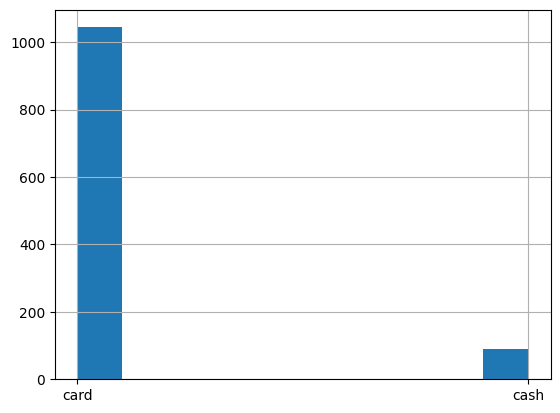

In [ ]:
coffee_sales['cash_type'].hist()

In [ ]:
coffee_sales['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.921447
cash,0.078553


~92% of the transactions are from card users.

In [ ]:
pd.DataFrame(coffee_sales['coffee_name'].value_counts(normalize=
True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


#Americano with Milk and Latte are our most popular coffee products. In the
#second tier are Cappuccino and Americano, while Cortado, Hot Chocolate,
#Espresso, and Cocoa are less popular.
#Next, let's conduct data transformations for further analysis.

In [ ]:
#Convert date and datetime to datetme format
coffee_sales['date']=pd.to_datetime(coffee_sales['date'])
coffee_sales['datetime']=pd.to_datetime(coffee_sales['datetime'])
#Create column of Month, Weekdays, and Hours
coffee_sales['month']=coffee_sales['date'].dt.strftime('%Y-%m')
coffee_sales['day']=coffee_sales['date'].dt.strftime('%w')
coffee_sales['hour']=coffee_sales['datetime'].dt.strftime('%H')

coffee_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [ ]:
coffee_sales.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,5,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,5,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,5,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,5,13


In [ ]:
[coffee_sales['date'].min(),coffee_sales['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

#The time range of this data set is from 2023-3-1 to 2024-7-31
#Let's first check the overall revenue by products.

           coffee_name    money
7                Latte  9009.14
1  Americano with Milk  8601.94
2           Cappuccino  7333.14
0            Americano  4644.54
6        Hot Chocolate  2778.48
4              Cortado  2745.08
3                Cocoa  1295.94
5             Espresso  1100.62


Text(0.5, 0, 'Revenue')

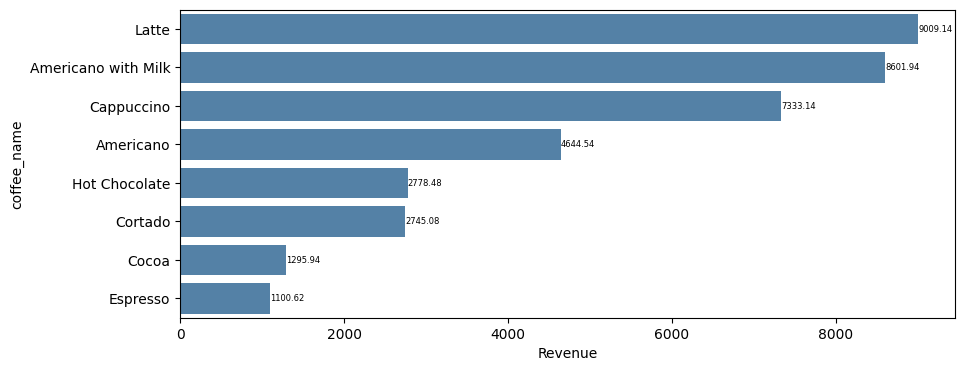

In [ ]:
revenue_data = coffee_sales.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

print(revenue_data)

plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')

Latte is the product with the highest revenue, while Expresso is the one at the
bottom. Then let's check the monthly data.

In [ ]:
monthly_sales = (coffee_sales.groupby(['coffee_name', 'month'])
    .size()
    .reset_index(name='count')
    .pivot(index='month', columns='coffee_name', values='count')
    .reset_index()
)

print(monthly_sales)

monthly_sales.describe().T.loc[:,['min','max']]

coffee_name    month  Americano  Americano with Milk  Cappuccino  Cocoa  \
0            2024-03         36                   34          20      6   
1            2024-04         35                   42          43      6   
2            2024-05         48                   58          55      9   
3            2024-06         14                   69          46      5   
4            2024-07         36                   65          32      9   

coffee_name  Cortado  Espresso  Hot Chocolate  Latte  
0                 30        10             22     48  
1                 19         7             13     31  
2                 17         8             14     58  
3                 19        10             14     50  
4                 14        14             11     56  


,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x7fd0c23ab250>,
 [Text(0, 0, '2024-03'),
  Text(1, 0, '2024-04'),
  Text(2, 0, '2024-05'),
  Text(3, 0, '2024-06'),
  Text(4, 0, '2024-07')])

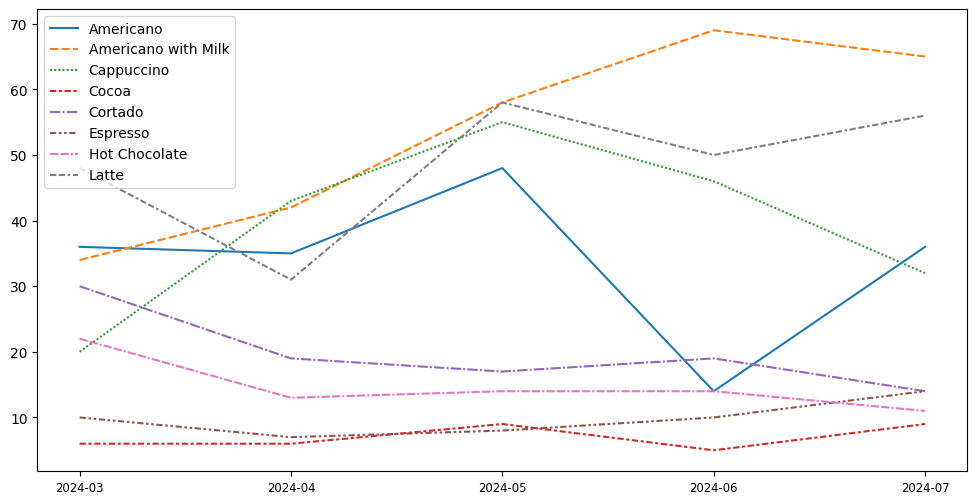

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

As shown in the line chart above, Americano with Milk and Latte, and
Cappuccino are top selling coffee types, while Cocoa and Expresso have
lowest sales. Additionally, Americano with Milk and Latte show an upward
trending.

  day  count
0   0    151
1   1    151
2   2    185
3   3    165
4   4    164
5   5    163
6   6    154


([<matplotlib.axis.XTick at 0x7fd0bff73550>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

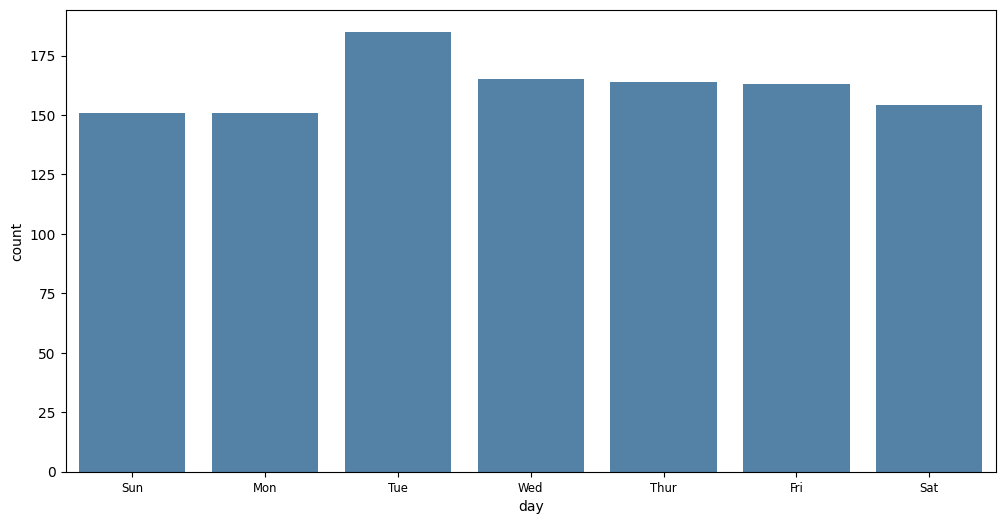

In [ ]:
weekday_sales = coffee_sales.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})

print(weekday_sales)
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],size='small')

The bar chart reveals that Tuesday has the highest sales of the week, while
sales on the other days are relatively similar.

In [ ]:
daily_sales = coffee_sales.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)

print(daily_sales)

daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

coffee_name       date  Americano  Americano with Milk  Cappuccino  Cocoa  \
0           2024-03-01        1.0                  4.0         0.0    1.0   
1           2024-03-02        3.0                  3.0         0.0    0.0   
2           2024-03-03        1.0                  2.0         0.0    1.0   
3           2024-03-04        0.0                  1.0         0.0    0.0   
4           2024-03-05        0.0                  0.0         0.0    1.0   
..                 ...        ...                  ...         ...    ...   
145         2024-07-27        0.0                  5.0         4.0    0.0   
146         2024-07-28        0.0                  1.0         0.0    0.0   
147         2024-07-29        3.0                  2.0         2.0    1.0   
148         2024-07-30        2.0                 12.0         2.0    0.0   
149         2024-07-31        2.0                  6.0         1.0    2.0   

coffee_name  Cortado  Espresso  Hot Chocolate  Latte  
0                0.0

,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


This table provides us the infomation of how many of each products can be
sold in each day.

   hour  count
0    07     13
1    08     44
2    09     50
3    10    133
4    11    103
5    12     87
6    13     78
7    14     76
8    15     65
9    16     77
10   17     77
11   18     75
12   19     96
13   20     54
14   21     70
15   22     35


<Axes: xlabel='hour', ylabel='count'>

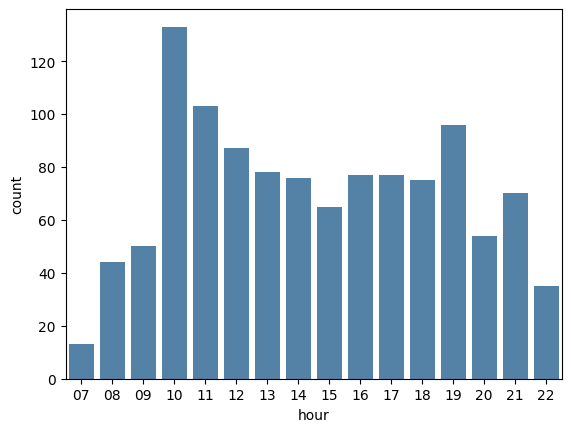

In [ ]:
hourly_sales = coffee_sales.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
print(hourly_sales)

sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

Overall, two peak hours within each day can be observed: 10:00am and
7:00pm. Then, let's check if any difference for different products.
In [

In [ ]:
hourly_sales_by_coffee = coffee_sales.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()

print(hourly_sales_by_coffee)

coffee_name hour  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
0             07        5.0                  4.0         1.0    0.0      1.0   
1             08       10.0                  7.0         8.0    1.0      6.0   
2             09        8.0                 16.0         6.0    1.0      5.0   
3             10       20.0                 31.0        10.0    4.0      8.0   
4             11       21.0                 25.0        16.0    1.0     13.0   
5             12       14.0                 26.0        15.0    3.0      7.0   
6             13       18.0                 18.0        10.0    2.0     12.0   
7             14       15.0                 18.0        13.0    4.0      6.0   
8             15       14.0                 15.0         8.0    0.0      3.0   
9             16       10.0                 18.0        12.0    3.0     12.0   
10            17        9.0                 11.0        18.0    4.0      6.0   
11            18        9.0             

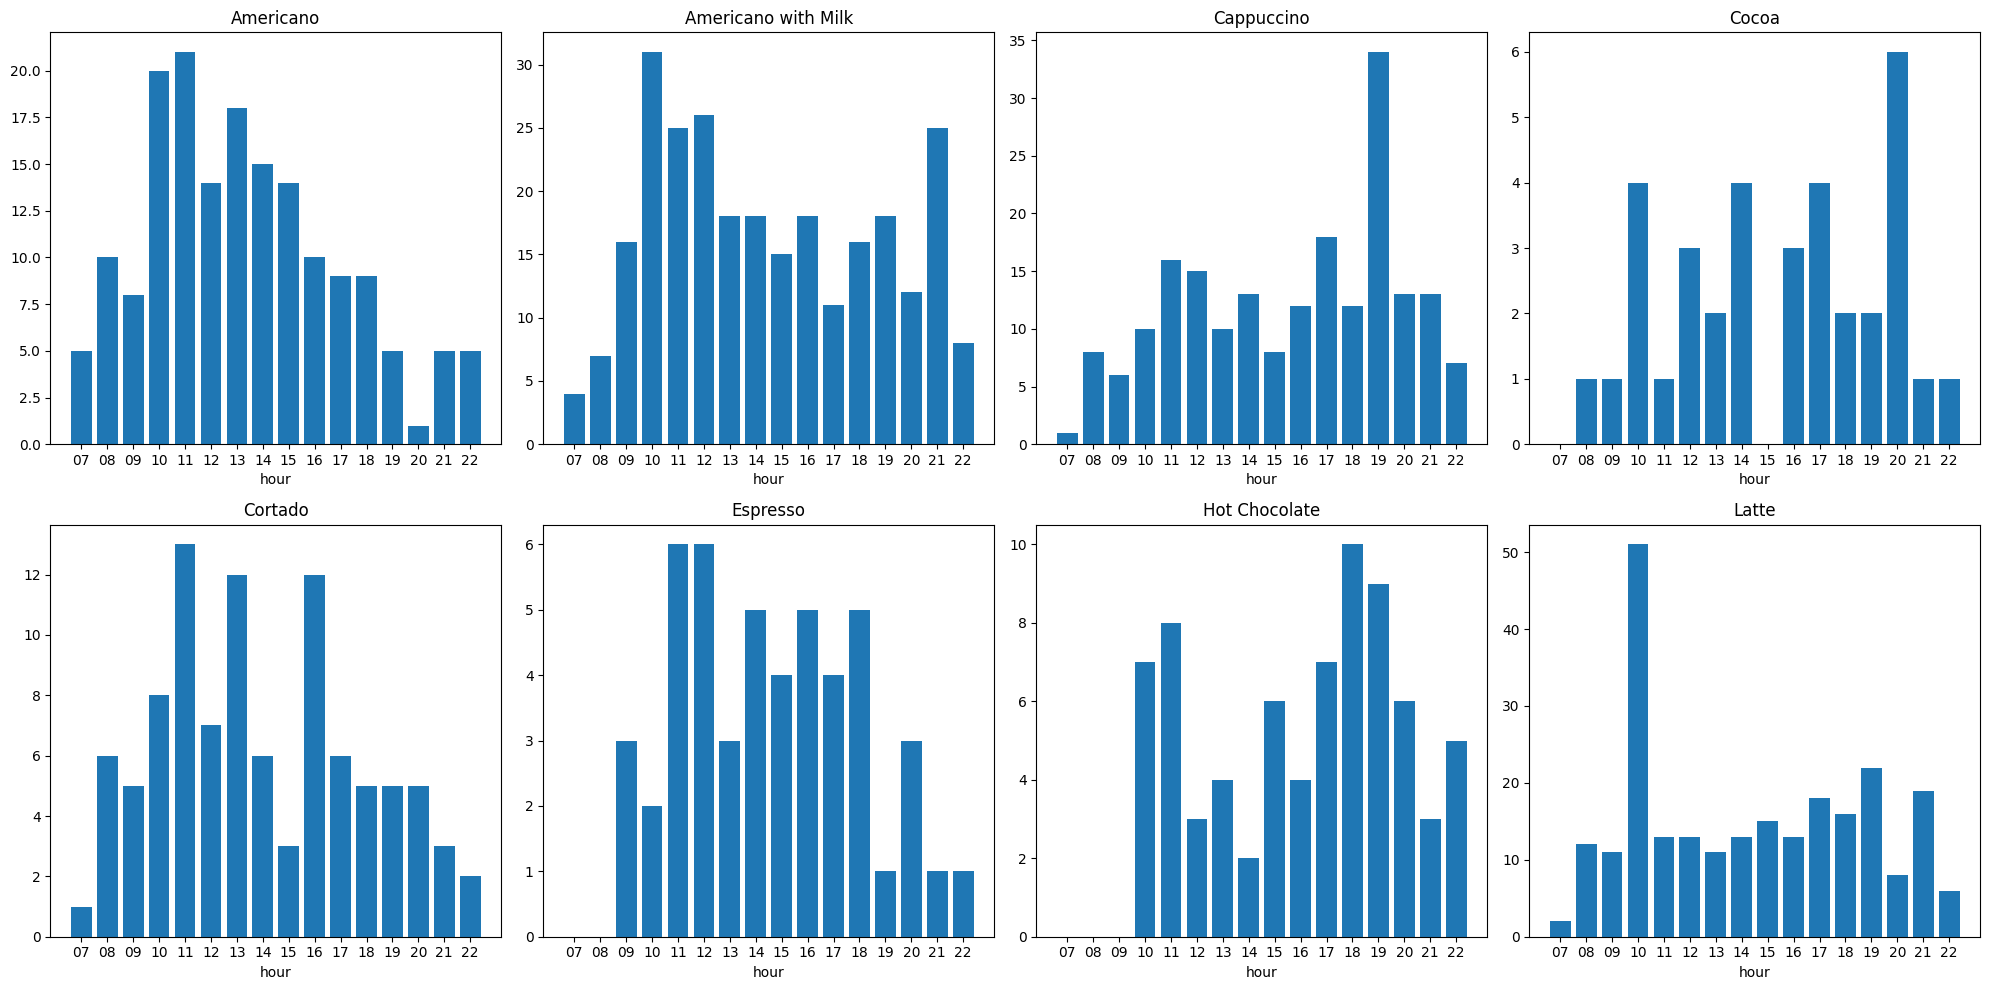

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration

axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the 'Index' column

for i, column in enumerate(hourly_sales_by_coffee.columns[1:]):

# Skip the first column ('Index')

  axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column])
  axs[i].set_title(f'{column}')
  axs[i].set_xlabel('hour')
  #axs[i].set_ylabel('Sales')
plt.tight_layout()
# Show the plot
plt.show()

The plots above illustrate the shopping traffic for each product throughout the
day. Notably, all products experience a peak in traffic around 10:00 AM, with
this trend being particularly pronounced for Latte. Additionally, Cappuccino,
Cocoa, and Hot Chocolate tend to be more popular during the evening hours,
specifically between 6:00pm and 8:00pm.

In [ ]:
from sklearn.model_selection import train_test_split

# Example: suppose you want to predict 'money'

# Features (X) and Target (y)

X = coffee_sales[['coffee_name', 'cash_type', 'datetime']]  # features
y = coffee_sales['money']  # target (what you want to predict)

# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,    # 20% for testing
    random_state=42   # random seed for reproducibility
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (906, 3)
Testing set size: (227, 3)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid changing original
X_encoded = X.copy()

# Create LabelEncoders
le_coffee = LabelEncoder()
le_cash = LabelEncoder()

# Fit and transform the text columns
X_encoded['coffee_name'] = le_coffee.fit_transform(X_encoded['coffee_name'])
X_encoded['cash_type'] = le_cash.fit_transform(X_encoded['cash_type'])

# Now X_encoded is fully numeric
print(X_encoded.head())

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42
)

   coffee_name  cash_type                datetime
0            7          0 2024-03-01 10:15:50.520
1            6          0 2024-03-01 12:19:22.539
2            6          0 2024-03-01 12:20:18.089
3            0          0 2024-03-01 13:46:33.006
4            7          0 2024-03-01 13:48:14.626


Training a simple model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Initialize the model
model = LinearRegression()

In [ ]:


# Now your features include hour, day, month
X = coffee_sales[['coffee_name', 'cash_type', 'hour', 'day', 'month']]

# Encode the text columns as before
X_encoded = X.copy()
X_encoded['coffee_name'] = le_coffee.fit_transform(X_encoded['coffee_name'])
X_encoded['cash_type'] = le_cash.fit_transform(X_encoded['cash_type'])

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
#Train the model
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 15.704060759273428
R^2 Score: 0.1564427184763092


In [ ]:
# Model Interpretation and Conclusion
# You can interpret the model by looking at the coefficients:

coefficients = pd.DataFrame(model.coef_, X.columns,
columns=['Coefficient'])
print(coefficients)

             Coefficient
coffee_name     0.748819
cash_type       1.707189
hour            0.180197
day            -0.007517
month          -1.105061
